In [1]:
# =============================================================================
# IMPORTING LIBRARIES
# =============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("viridis")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# =============================================================================
# DATA LOADING AND BASIC INFORMATION
# =============================================================================

print("\n" + "="*60)
print("DATA LOADING AND BASIC INFORMATION")
print("="*60)

# Load the dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Display basic information
print("📊 Dataset Shape:", df.shape)
print(f"📋 Columns: {list(df.columns)}")

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()


DATA LOADING AND BASIC INFORMATION
📊 Dataset Shape: (7043, 21)
📋 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [3]:
# =============================================================================
# DATA CLEANING AND PREPROCESSING
# =============================================================================

print("\n" + "="*60)
print("DATA CLEANING AND PREPROCESSING")
print("="*60)

# Check for empty strings and replace with NaN
df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

# Convert TotalCharges to numeric (it's stored as object due to empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing Values after cleaning:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values (drop rows with missing values)
initial_count = len(df)
df = df.dropna()
final_count = len(df)
print(f"\n📉 Dropped {initial_count - final_count} rows with missing values")
print(f"📈 Remaining rows: {final_count}")

# Convert Churn to binary (0/1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify column types
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in df.columns if col not in numerical_cols + ['customerID', 'Churn']]

print(f"\n🔢 Numerical columns: {numerical_cols}")
print(f"🏷️  Categorical columns: {categorical_cols}")

print("\nSummary Statistics for Numerical Features:")
display(df[numerical_cols].describe())



DATA CLEANING AND PREPROCESSING
Missing Values after cleaning:
TotalCharges    11
dtype: int64

📉 Dropped 11 rows with missing values
📈 Remaining rows: 7032

🔢 Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
🏷️  Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Summary Statistics for Numerical Features:


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



EXPLORATORY DATA ANALYSIS (EDA)

🎯 TARGET VARIABLE ANALYSIS


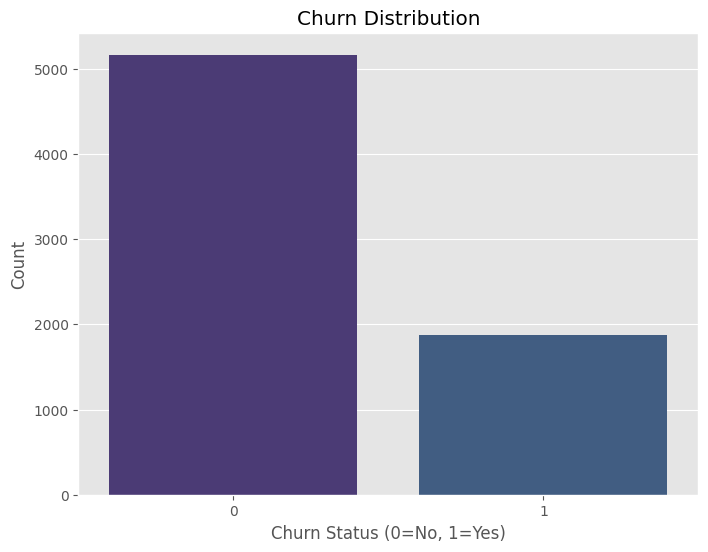

📊 Churn Rate: 26.58%
📊 Non-Churn: 73.42%
📊 Class Distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

📈 NUMERICAL FEATURES ANALYSIS


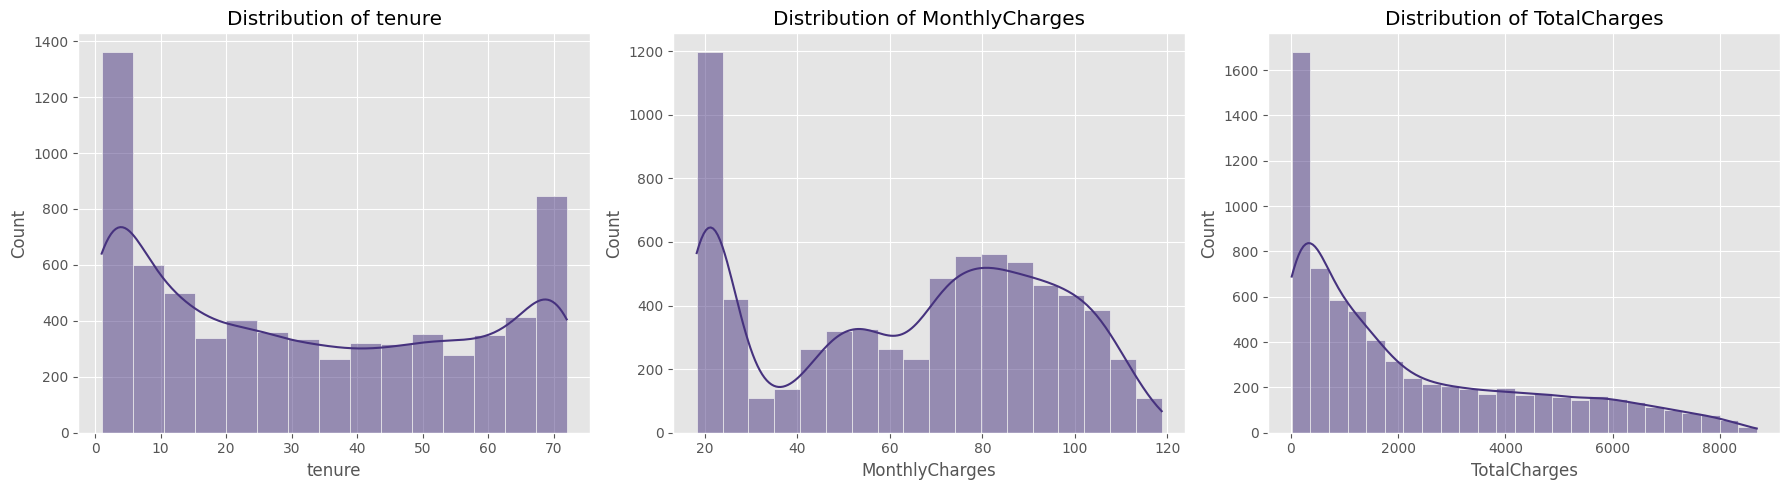


🔗 CORRELATION ANALYSIS


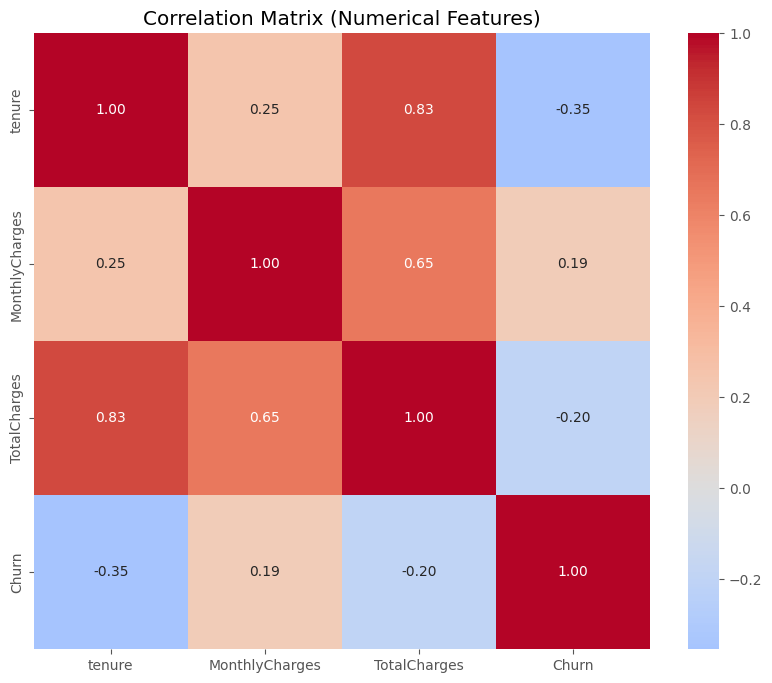

Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64

🏷️ CATEGORICAL FEATURES ANALYSIS


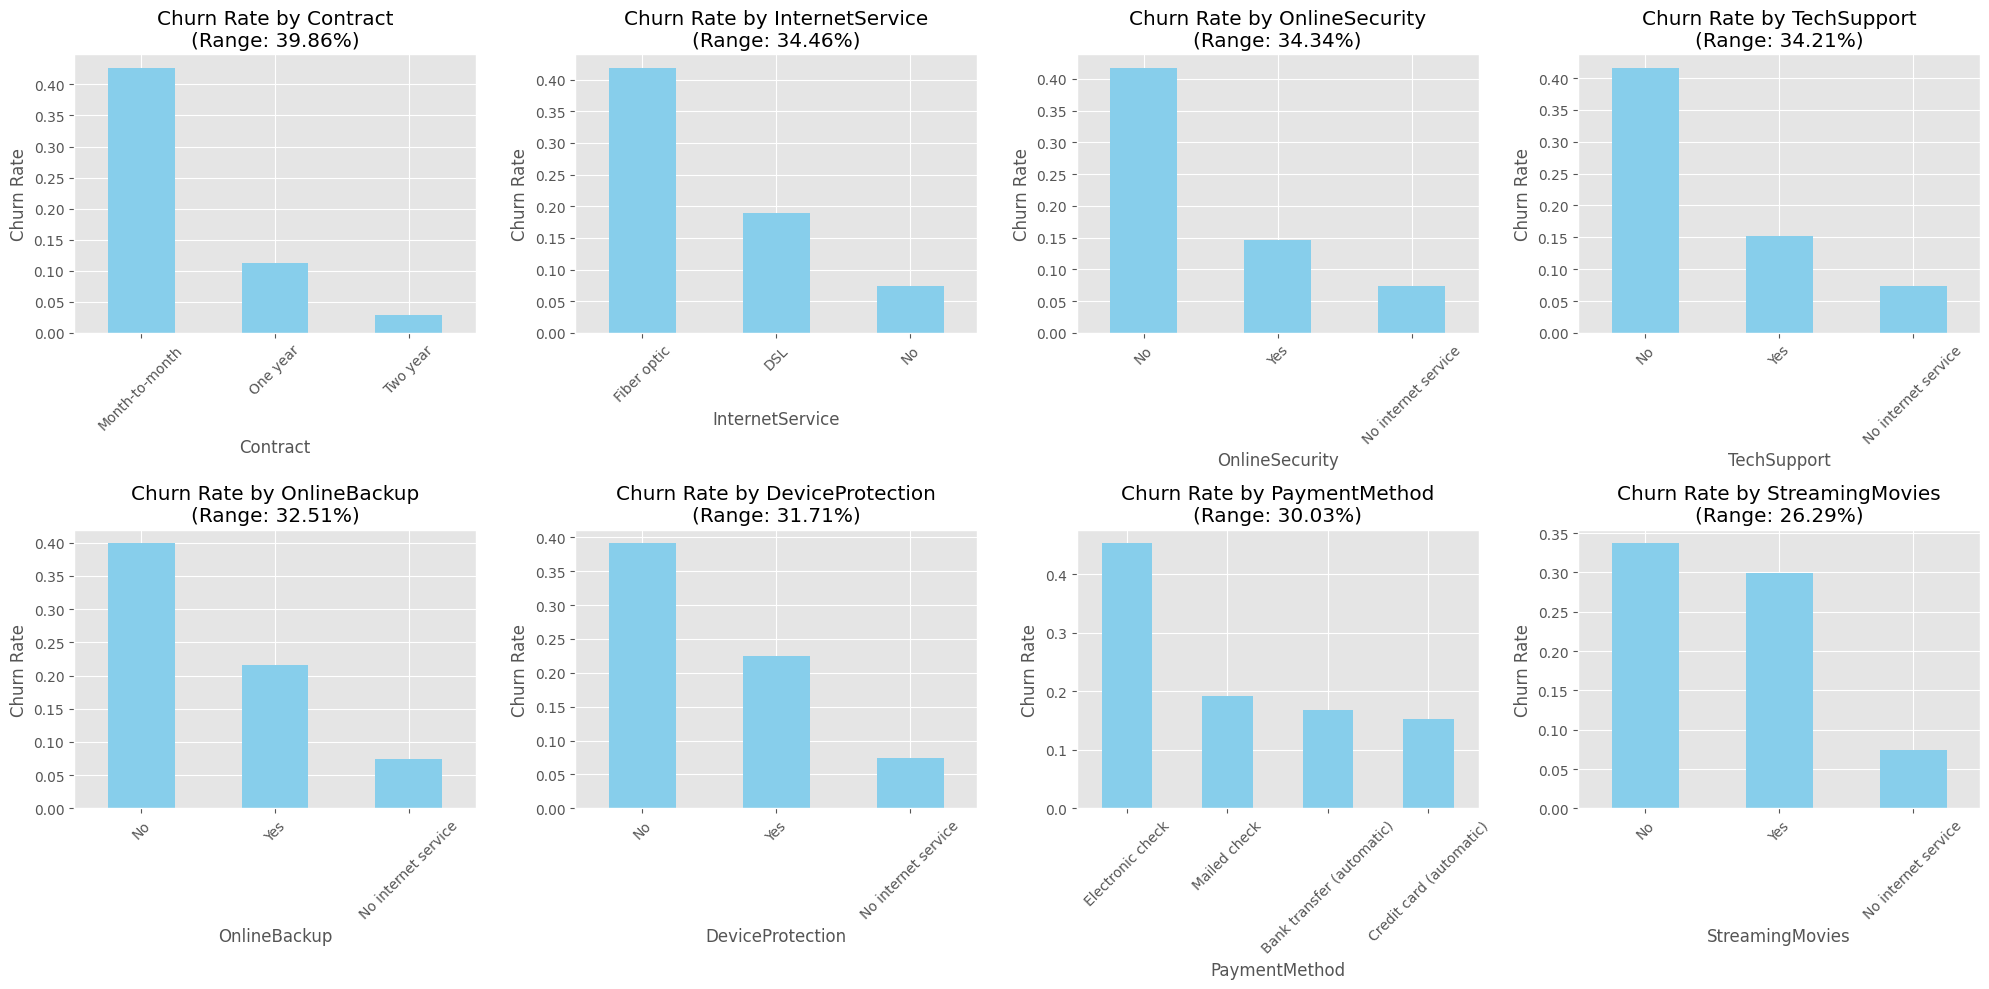


⏰ TENURE ANALYSIS


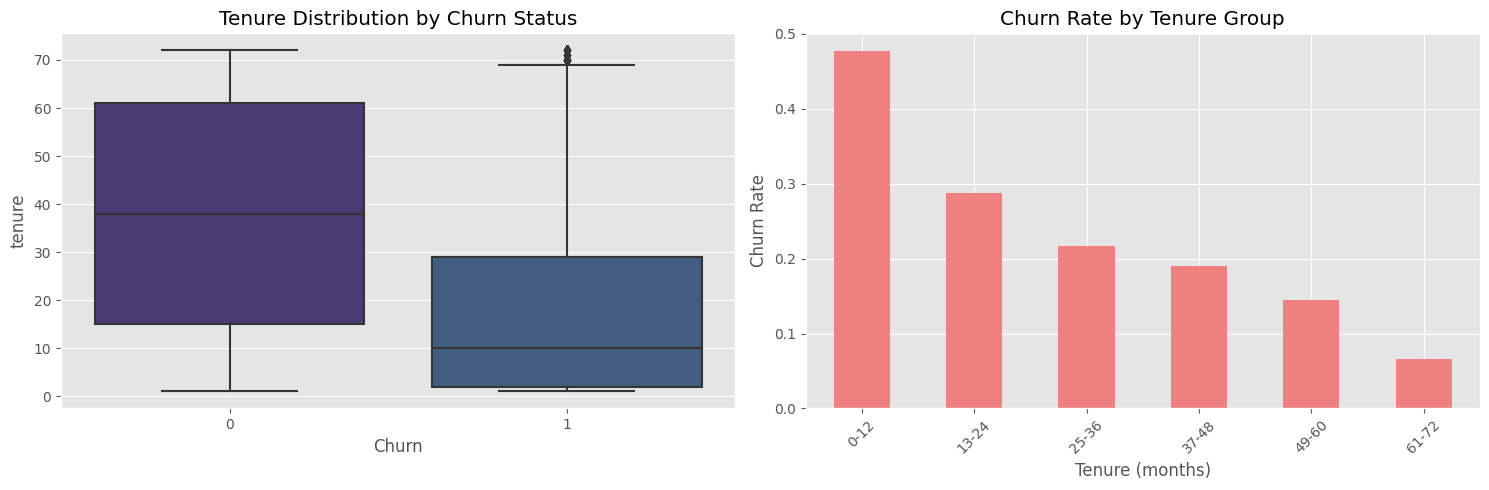

In [4]:
# =============================================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# 1. Target Variable Analysis
print("\n🎯 TARGET VARIABLE ANALYSIS")

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

churn_rate = df['Churn'].mean()
print(f"📊 Churn Rate: {churn_rate:.2%}")
print(f"📊 Non-Churn: {(1 - churn_rate):.2%}")
print(f"📊 Class Distribution:\n{df['Churn'].value_counts()}")

# 2. Numerical Features Analysis
print("\n📈 NUMERICAL FEATURES ANALYSIS")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
print("\n🔗 CORRELATION ANALYSIS")

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

print("Correlation with Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

# 4. Categorical Features Analysis
print("\n🏷️ CATEGORICAL FEATURES ANALYSIS")

# Plot top 8 categorical features with highest impact on churn
top_categories = 8
churn_impact = {}

for col in categorical_cols:
    churn_rates = df.groupby(col)['Churn'].mean()
    churn_impact[col] = churn_rates.max() - churn_rates.min()

# Get top categories with highest churn impact
top_cols = sorted(churn_impact, key=churn_impact.get, reverse=True)[:top_categories]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(top_cols):
    if i < len(axes):
        churn_rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
        churn_rates.plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'Churn Rate by {col}\n(Range: {churn_rates.max()-churn_rates.min():.2%})')
        axes[i].set_ylabel('Churn Rate')
        axes[i].tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()

# 5. Tenure Analysis
print("\n⏰ TENURE ANALYSIS")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn Status')

plt.subplot(1, 2, 2)
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
tenure_churn = df.groupby('tenure_group')['Churn'].mean()
tenure_churn.plot(kind='bar', color='lightcoral')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [5]:
# =============================================================================
# DATA PREPARATION FOR MODELING
# =============================================================================

print("\n" + "="*60)
print("DATA PREPARATION FOR MODELING")
print("="*60)

# Prepare data for modeling
X = df.drop(['customerID', 'Churn', 'tenure_group'], axis=1)
y = df['Churn']

# Split categorical and numerical features
X_categorical = X[categorical_cols]
X_numerical = X[numerical_cols]

# Encode categorical variables
X_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine with numerical features
X_final = pd.concat([X_numerical, X_encoded], axis=1)

print(f"✅ Final feature matrix shape: {X_final.shape}")
print(f"✅ Target variable shape: {y.shape}")

# Check class balance
print(f"\n📊 Class distribution:")
print(y.value_counts())
print(f"📈 Churn rate: {y.mean():.2%}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📋 Training set: {X_train.shape}")
print(f"📋 Test set: {X_test.shape}")
print(f"📊 Training churn rate: {y_train.mean():.2%}")
print(f"📊 Test churn rate: {y_test.mean():.2%}")


DATA PREPARATION FOR MODELING
✅ Final feature matrix shape: (7032, 30)
✅ Target variable shape: (7032,)

📊 Class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64
📈 Churn rate: 26.58%

📋 Training set: (5625, 30)
📋 Test set: (1407, 30)
📊 Training churn rate: 26.58%
📊 Test churn rate: 26.58%


In [6]:
# =============================================================================
# FEATURE SCALING
# =============================================================================

print("\n" + "="*60)
print("FEATURE SCALING")
print("="*60)

# Scale numerical features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("✅ Features scaled successfully!")
print("📊 Scaled training set shape:", X_train_scaled.shape)
print("📊 Scaled test set shape:", X_test_scaled.shape)


FEATURE SCALING
✅ Features scaled successfully!
📊 Scaled training set shape: (5625, 30)
📊 Scaled test set shape: (1407, 30)


# =============================================================================
# MODEL TRAINING AND EVALUATION
# =============================================================================


🔍 Training Logistic Regression...
✅ Logistic Regression trained successfully!
📊 Accuracy: 0.8045
📊 ROC AUC: 0.8361

📋 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



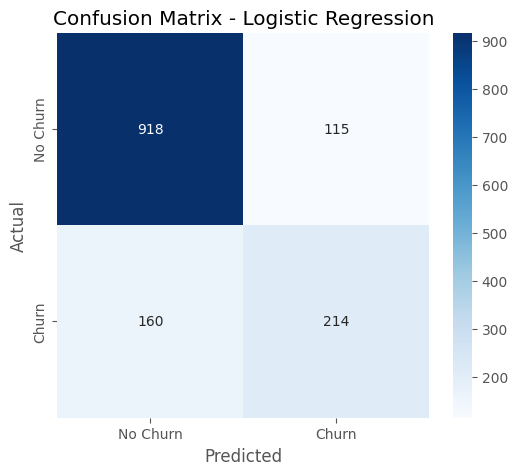


🔍 Training Random Forest...
✅ Random Forest trained successfully!
📊 Accuracy: 0.7882
📊 ROC AUC: 0.8201

📋 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



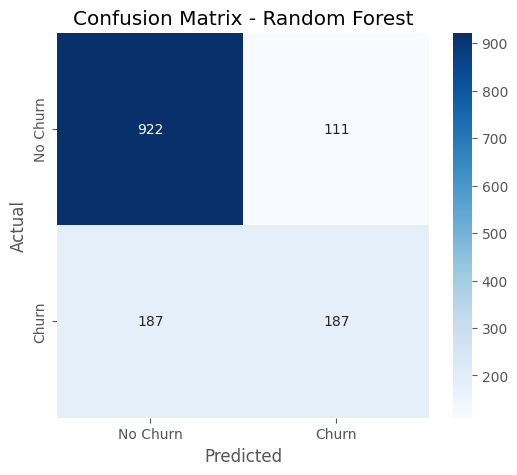


🔍 Training Gradient Boosting...
✅ Gradient Boosting trained successfully!
📊 Accuracy: 0.7953
📊 ROC AUC: 0.8407

📋 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



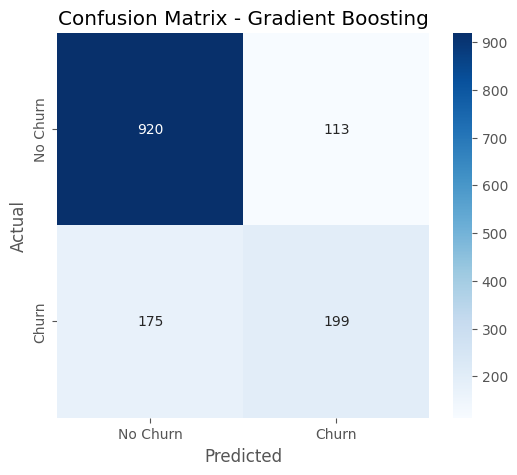


MODEL COMPARISON


,Model,Accuracy,ROC AUC
2,Gradient Boosting,0.795309,0.840680
0,Logistic Regression,0.804549,0.836071
1,Random Forest,0.788202,0.820131


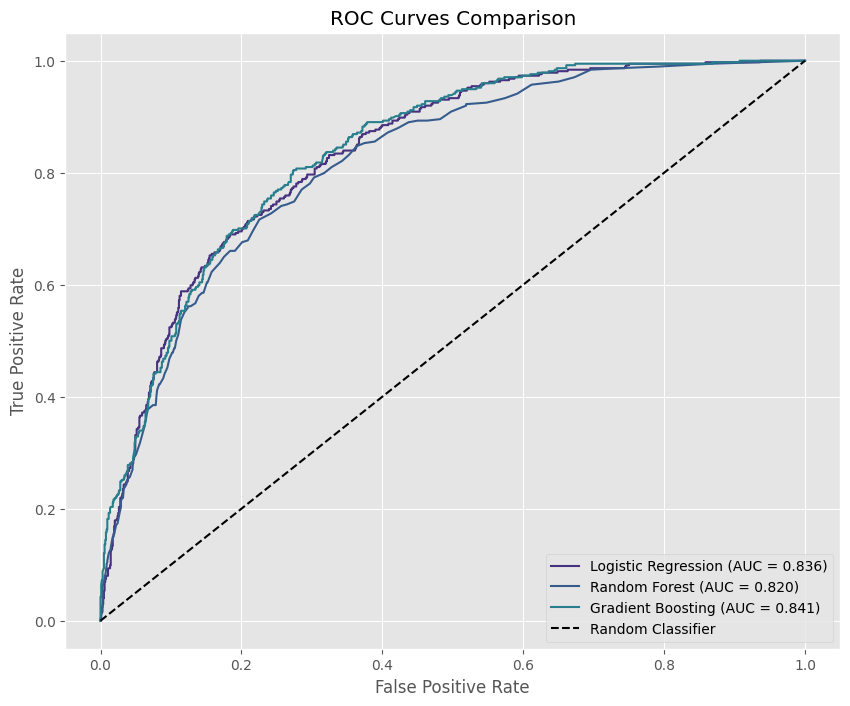

In [7]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    
    # For Logistic Regression, use scaled data
    if name == 'Logistic Regression':
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
    else:
        X_train_used = X_train
        X_test_used = X_test
    
    # Train the model
    model.fit(X_train_used, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_used)
    y_pred_proba = model.predict_proba(X_test_used)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print results
    print(f"✅ {name} trained successfully!")
    print(f"📊 Accuracy: {accuracy:.4f}")
    print(f"📊 ROC AUC: {roc_auc:.4f}")
    
    # Display classification report
    print(f"\n📋 Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Compare model performance
print("\n" + "="*40)
print("MODEL COMPARISON")
print("="*40)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'ROC AUC': [results[name]['roc_auc'] for name in results]
}).sort_values('ROC AUC', ascending=False)

display(comparison_df)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

# =============================================================================
# HYPERPARAMETER TUNING
# =============================================================================

In [8]:
# Identify the best model based on ROC AUC
best_model_name = comparison_df.iloc[0]['Model']
print(f"🎯 Best model for tuning: {best_model_name}")

# Define parameter grids for different models
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Select the appropriate parameter grid
param_grid = param_grids[best_model_name]

# Select the appropriate data (scaled for Logistic Regression)
if best_model_name == 'Logistic Regression':
    X_train_used = X_train_scaled
    X_test_used = X_test_scaled
else:
    X_train_used = X_train
    X_test_used = X_test

# Perform Grid Search with Cross-Validation
print(f"🔍 Tuning {best_model_name} with GridSearchCV...")

# Initialize the model
base_model = models[best_model_name]

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train_used, y_train)

# Get the best model and parameters
best_tuned_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"✅ Best parameters: {best_params}")
print(f"📊 Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the tuned model on test data
y_pred_tuned = best_tuned_model.predict(X_test_used)
y_pred_proba_tuned = best_tuned_model.predict_proba(X_test_used)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"\n📋 Tuned Model Performance:")
print(f"📊 Accuracy: {accuracy_tuned:.4f}")
print(f"📊 ROC AUC: {roc_auc_tuned:.4f}")

# Compare with the original model
original_accuracy = results[best_model_name]['accuracy']
original_roc_auc = results[best_model_name]['roc_auc']

print(f"\n📈 Improvement Comparison:")
print(f"Accuracy: {original_accuracy:.4f} → {accuracy_tuned:.4f} "
      f"({(accuracy_tuned - original_accuracy):.4f})")
print(f"ROC AUC: {original_roc_auc:.4f} → {roc_auc_tuned:.4f} "
      f"({(roc_auc_tuned - original_roc_auc):.4f})")

# Display classification report for tuned model
print(f"\n📋 Classification Report for Tuned {best_model_name}:")
print(classification_report(y_test, y_pred_tuned))

🎯 Best model for tuning: Gradient Boosting
🔍 Tuning Gradient Boosting with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
📊 Best cross-validation score: 0.8470

📋 Tuned Model Performance:
📊 Accuracy: 0.7903
📊 ROC AUC: 0.8381

📈 Improvement Comparison:
Accuracy: 0.7953 → 0.7903 (-0.0050)
ROC AUC: 0.8407 → 0.8381 (-0.0026)

📋 Classification Report for Tuned Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# =============================================================================
# MODEL SERIALIZATION
# =============================================================================

In [9]:
# =============================================================================
# MODEL SERIALIZATION
# =============================================================================

print("\n" + "="*60)
print("MODEL SERIALIZATION")
print("="*60)

# Create a dictionary with all the artifacts to save
artifacts = {
    'model': best_tuned_model,
    'scaler': scaler,
    'feature_names': list(X_final.columns),
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'model_performance': {
        'accuracy': accuracy_tuned,
        'roc_auc': roc_auc_tuned
    }
}

# Save the artifacts using joblib
joblib.dump(artifacts, 'churn_prediction_model.pkl')

print("✅ Model and artifacts saved successfully as 'churn_prediction_model.pkl'")

# To demonstrate loading, let's load the model back
print("\n🔍 Demonstrating model loading...")
loaded_artifacts = joblib.load('churn_prediction_model.pkl')
loaded_model = loaded_artifacts['model']

# Make a sample prediction with the loaded model
sample_idx = 0
sample_data = X_test_used.iloc[sample_idx:sample_idx+1]
prediction = loaded_model.predict(sample_data)
prediction_proba = loaded_model.predict_proba(sample_data)

print(f"📋 Sample prediction for test index {sample_idx}:")
print(f"   Actual value: {y_test.iloc[sample_idx]}")
print(f"   Predicted value: {prediction[0]}")
print(f"   Prediction probabilities: {prediction_proba[0]}")

print("\n✅ Model loading and prediction successful!")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)

print(f"📁 Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"🎯 Target variable: Churn (binary)")
print(f"📊 Churn rate: {df['Churn'].mean():.2%}")
print(f"🔢 Numerical features: {len(numerical_cols)}")
print(f"🏷️  Categorical features: {len(categorical_cols)}")
print(f"📈 Final features for modeling: {X_final.shape[1]}")
print(f"📋 Training set: {X_train.shape}")
print(f"🧪 Test set: {X_test.shape}")
print(f"🏆 Best model: {best_model_name}")
print(f"📊 Best model accuracy: {accuracy_tuned:.4f}")
print(f"📊 Best model ROC AUC: {roc_auc_tuned:.4f}")
print(f"💾 Model saved: churn_prediction_model.pkl")

print("\n🎉 PROJECT COMPLETE! Your customer churn prediction model is ready!")


MODEL SERIALIZATION
✅ Model and artifacts saved successfully as 'churn_prediction_model.pkl'

🔍 Demonstrating model loading...
📋 Sample prediction for test index 0:
   Actual value: 0
   Predicted value: 0
   Prediction probabilities: [0.97889629 0.02110371]

✅ Model loading and prediction successful!

PROJECT SUMMARY
📁 Dataset: 7032 rows, 22 columns
🎯 Target variable: Churn (binary)
📊 Churn rate: 26.58%
🔢 Numerical features: 3
🏷️  Categorical features: 16
📈 Final features for modeling: 30
📋 Training set: (5625, 30)
🧪 Test set: (1407, 30)
🏆 Best model: Gradient Boosting
📊 Best model accuracy: 0.7903
📊 Best model ROC AUC: 0.8381
💾 Model saved: churn_prediction_model.pkl

🎉 PROJECT COMPLETE! Your customer churn prediction model is ready!


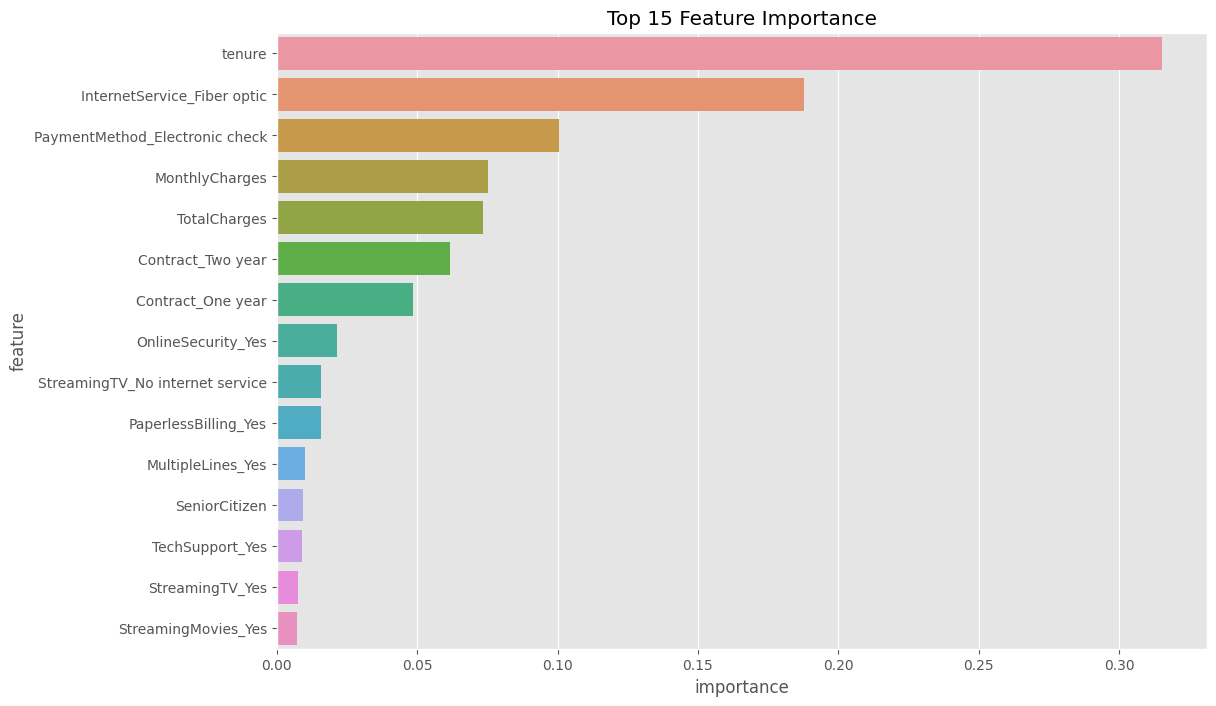

In [10]:
# Feature importance for tree-based models
if hasattr(best_tuned_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_final.columns,
        'importance': best_tuned_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importance')
    plt.show()